In [154]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [155]:
df = pd.read_csv("ML_Math.csv")
df.head()

,school_GP,sex_male,age,address_urban,large_famsize,Parents_together,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,Dalc,Walc,absences_por,por_score,absences_math,math_score,math_pass,por_pass
0,True,False,18,True,True,False,4,4,False,True,...,4,3,1,1,4.000,11.000,6.000,6.000,0.000,1.000
1,True,False,17,True,True,True,1,1,False,True,...,5,3,1,1,2.000,11.000,4.000,6.000,0.000,1.000
2,True,True,16,True,False,True,2,2,True,True,...,4,4,1,1,0.000,13.000,0.000,11.000,1.000,1.000
3,True,False,17,True,True,False,4,4,True,True,...,4,1,1,1,2.000,13.000,6.000,6.000,0.000,1.000
4,True,False,15,True,True,True,2,1,True,True,...,5,2,1,1,0.000,13.000,4.000,12.000,1.000,1.000


In [156]:
# Eliminar columnas que no aportan valor al análisis
df.drop(columns='absences_por', inplace=True)
df.drop(columns='por_score', inplace=True)
df.drop(columns='por_pass', inplace=True)
df.drop(columns='math_score', inplace=True)


In [157]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Valores únicos en la columna {column}: {unique_values}\n")

print(df.dtypes)

Valores únicos en la columna school_GP: 2

Valores únicos en la columna sex_male: 2

Valores únicos en la columna age: 8

Valores únicos en la columna address_urban: 2

Valores únicos en la columna large_famsize: 2

Valores únicos en la columna Parents_together: 2

Valores únicos en la columna Medu: 5

Valores únicos en la columna Fedu: 5

Valores únicos en la columna Mjob: 2

Valores únicos en la columna Fjob: 2

Valores únicos en la columna traveltime: 4

Valores únicos en la columna studytime: 4

Valores únicos en la columna failures: 4

Valores únicos en la columna schoolsup: 2

Valores únicos en la columna famsup: 2

Valores únicos en la columna paid: 2

Valores únicos en la columna activities: 2

Valores únicos en la columna nursery: 2

Valores únicos en la columna internet: 2

Valores únicos en la columna romantic: 2

Valores únicos en la columna famrel: 5

Valores únicos en la columna freetime: 5

Valores únicos en la columna Dalc: 5

Valores únicos en la columna Walc: 5

Valor

In [158]:
## Escalación efectiva de características numéricas

# Para mejorar el rendimiento de algunos algoritmos. 
# Un enfoque común es usar StandardScaler de sklearn.preprocessing 
# al trabajar con modelos de aprendizaje automático. 

from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar las columnas 
for column in df.columns:
    if column != "math_pass":
        df[[column]] = scaler.fit_transform(df[[column]])

pd.set_option('display.float_format', '{:.3f}'.format)
stats = df.describe()
stats

### Esto estandariza tus características numéricas para que tengan media 0 y desviación estándar 1.

,school_GP,sex_male,age,address_urban,large_famsize,Parents_together,Medu,Fedu,Mjob,Fjob,...,activities,nursery,internet,romantic,famrel,freetime,Dalc,Walc,absences_math,math_pass
count,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,...,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,...,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.671
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.470
min,-2.754,-0.948,-1.331,-1.868,-1.570,-2.938,-2.515,-2.320,-2.386,-4.330,...,-1.018,-1.969,-2.233,-0.708,-3.288,-2.241,-0.541,-1.004,-0.714,0.000
25%,0.363,-0.948,-0.546,0.535,-1.570,0.340,-0.685,-0.480,0.419,0.231,...,-1.018,0.508,0.448,-0.708,0.062,-0.236,-0.541,-1.004,-0.714,0.000
50%,0.363,-0.948,0.238,0.535,0.637,0.340,0.229,-0.480,0.419,0.231,...,0.982,0.508,0.448,-0.708,0.062,-0.236,-0.541,-0.226,-0.214,1.000
75%,0.363,1.055,1.023,0.535,0.637,0.340,1.144,0.440,0.419,0.231,...,0.982,0.508,0.448,1.412,1.179,0.766,0.583,0.551,0.287,1.000
max,0.363,1.055,4.162,0.535,0.637,0.340,1.144,1.360,0.419,0.231,...,0.982,0.508,0.448,1.412,1.179,1.769,3.956,2.106,8.669,1.000


### Selección de Características

Evalúa qué características son más relevantes para tu modelo. Puedes hacerlo a través de análisis de correlación, importancia de características, etc



In [159]:
# Calcular la matriz de correlación
matriz_correlacion = df.corr()

# Mostrar las correlaciones con la columna 'math_pass'
correlaciones_math_pass = matriz_correlacion['math_pass'].sort_values(ascending=False)
print("Correlaciones con math_pass:\n", correlaciones_math_pass)

Correlaciones con math_pass:
 math_pass           1.000
Medu                0.115
Fedu                0.108
paid                0.093
studytime           0.075
sex_male            0.071
internet            0.062
address_urban       0.052
famrel              0.047
Mjob                0.039
Fjob                0.035
school_GP           0.031
activities          0.012
nursery            -0.009
freetime           -0.018
Walc               -0.030
large_famsize      -0.042
Parents_together   -0.044
traveltime         -0.044
Dalc               -0.057
famsup             -0.059
absences_math      -0.092
romantic           -0.098
schoolsup          -0.100
age                -0.180
failures           -0.338
Name: math_pass, dtype: float64


### División de los Datos

Divide tu DataFrame en conjuntos de entrenamiento y prueba (usualmente 70%-30% o 80%-20%)

In [160]:
numerical_features = df.drop(columns='math_pass')
df['math_pass'] = df['math_pass'].astype(int)
target = df['math_pass']

X = numerical_features  # Features (all columns but the target)
y = target  # Target

X_train, X_test, y_train, y_test = train_test_split(numerical_features, target, test_size=0.2, random_state=42)

# test_size=0.2: Defines 20% of the data to be set aside for testing, 
# ensuring that 80% is used for training.

# random_state=42: Sets a seed for reproducibility, meaning you’ll get the same split 
# every time you run the script (using any integer value can suffice, 42 is commonly used).

# Check the shape of the splits to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (316, 25)
X_test shape: (79, 25)
y_train shape: (316,)
y_test shape: (79,)


In [161]:
from sklearn.tree import DecisionTreeClassifier


# Entrenar un árbol de decisión

tree = DecisionTreeClassifier(random_state=42)

tree.fit(X, y)

# Obtener la importancia de las características

importances = tree.feature_importances_

feature_importance_df = pd.DataFrame({

'Feature': X.columns,

'Importance': importances

}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
24     absences_math       0.130
12          failures       0.126
6               Medu       0.083
23              Walc       0.079
20            famrel       0.066
21          freetime       0.062
11         studytime       0.058
7               Fedu       0.056
18          internet       0.053
2                age       0.042
1           sex_male       0.040
13         schoolsup       0.030
22              Dalc       0.022
9               Fjob       0.020
10        traveltime       0.020
8               Mjob       0.018
5   Parents_together       0.018
0          school_GP       0.014
15              paid       0.014
19          romantic       0.011
4      large_famsize       0.011
16        activities       0.009
3      address_urban       0.007
14            famsup       0.007
17           nursery       0.004


### Entrenamiento del Modelo

Usa el método seleccionado para entrenar con los datos de entrenamiento

## Bagging and pasting

In [162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a base estimator, e.g., a Decision Tree
estimator = DecisionTreeClassifier(random_state=42)

# Bagging: use the default bootstrap=True
bagging_clf = BaggingClassifier(estimator=estimator, n_estimators=100, bootstrap=True, random_state=42)

# Pasting: set bootstrap=False
pasting_clf = BaggingClassifier(estimator=estimator, n_estimators=100, bootstrap=False, random_state=42)

# Fit the models
bagging_clf.fit(X_train, y_train)
pasting_clf.fit(X_train, y_train)

# You can then predict and evaluate them
bagging_score = bagging_clf.score(X_test, y_test)
pasting_score = pasting_clf.score(X_test, y_test)



## Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees in the forest

# n_estimators: The number of trees in the forest. More trees can lead to a better model, but 
# there's a trade-off with computational cost
# random_state: Ensures reproducibility by fixing the random seed.

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test)




In [164]:
##Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
gb_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = gb_clf.predict(X_test)

#n_estimators: Number of boosting stages (trees) to be built. More trees can improve 
# the model at the cost of computational time.
#learning_rate: Determines the contribution of each tree. A smaller value typically 
# requires more trees.


In [165]:
##AdaptativeBoosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base estimator
estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost Classifier
ada_clf = AdaBoostClassifier(estimator=estimator, n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data
ada_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = ada_clf.predict(X_test)


### Evaluación del Modelo

Evalúa el rendimiento usando métrica(s) adecuada(s) para tu problema (por ejemplo, RMSE para regresión, precisión o F1 Score para clasificación)

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Lista de modelos a evaluar
modelos = {
    'Adaptive Boosting': ada_clf,
    'Gradient Boosting': gb_clf,
    'Random Forest': rf_clf,
    'Bagging': bagging_clf,
    'Pasting': pasting_clf
}

# Iterar sobre los modelos, entrenarlos y calcular métricas
for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Obtener predicciones
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Mostrar los resultados
    print(f'\n{nombre}')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')



Adaptive Boosting
Accuracy: 0.620
Precision: 0.604
Recall: 0.620
F1 Score: 0.538

Gradient Boosting
Accuracy: 0.633
Precision: 0.617
Recall: 0.633
F1 Score: 0.591

Random Forest
Accuracy: 0.684
Precision: 0.719
Recall: 0.684
F1 Score: 0.631

Bagging
Accuracy: 0.595
Precision: 0.554
Recall: 0.595
F1 Score: 0.533

Pasting
Accuracy: 0.494
Precision: 0.467
Recall: 0.494
F1 Score: 0.476


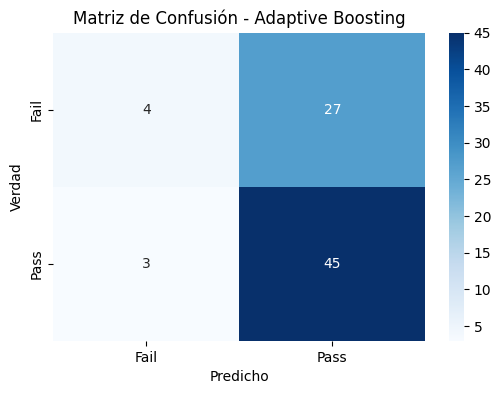

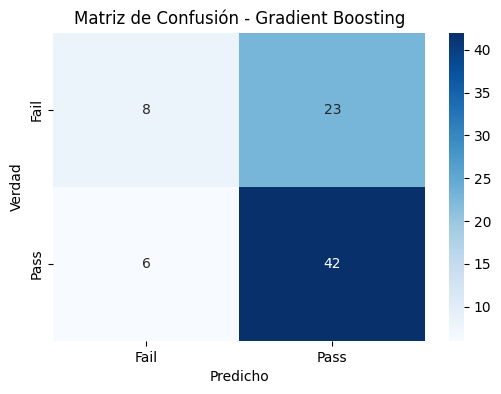

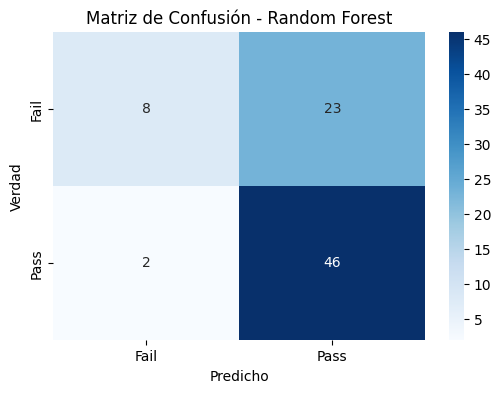

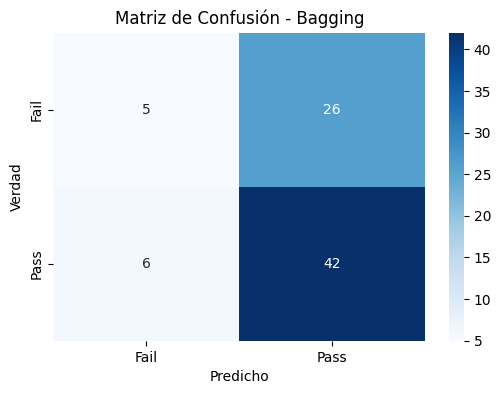

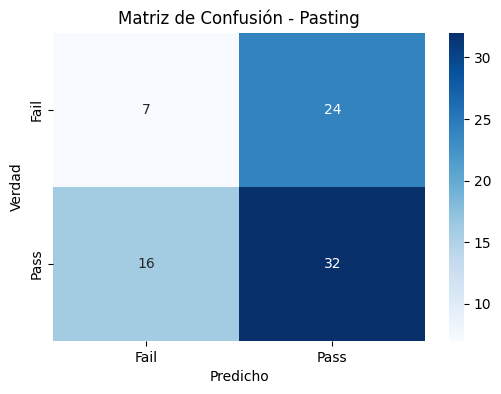

In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir tus etiquetas personalizadas
etiquetas = ['Fail', 'Pass']

for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Obtener predicciones
    y_pred = modelo.predict(X_test)
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicho')
    plt.ylabel('Verdad')
    plt.show()
    

In [182]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

# Define tus modelos en un diccionario
modelos = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Adaptive Boosting': AdaBoostClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

# Definir los datos
X = df.drop(columns=['math_pass'])
y = df['math_pass']

# Configurar K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterar sobre cada modelo y calcular métricas
for nombre, modelo in modelos.items():
    # Calcula la precision media
    accuracy = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy').mean()
    
    # Calcula otras métricas
    precision = cross_val_score(modelo, X, y, cv=kf, scoring=make_scorer(precision_score)).mean()
    recall = cross_val_score(modelo, X, y, cv=kf, scoring=make_scorer(recall_score)).mean()
    f1 = cross_val_score(modelo, X, y, cv=kf, scoring=make_scorer(f1_score)).mean()
    
    # Mostrar resultados
    print(f'\n{nombre}')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')


Random Forest
Accuracy: 0.706
Precision: 0.738
Recall: 0.882
F1 Score: 0.801

Gradient Boosting
Accuracy: 0.686
Precision: 0.734
Recall: 0.842
F1 Score: 0.782

Adaptive Boosting
Accuracy: 0.724
Precision: 0.752
Recall: 0.883
F1 Score: 0.811

Bagging
Accuracy: 0.638
Precision: 0.738
Recall: 0.720
F1 Score: 0.726


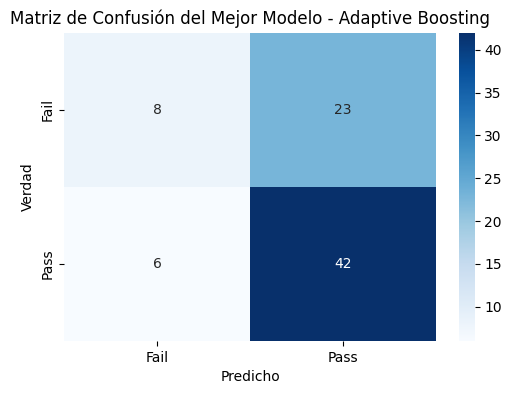

Accuracy en Prueba del Modelo: 0.633


In [183]:
best_model = AdaBoostClassifier(random_state=42)  # Ajusta los hiperparámetros si es necesario
best_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Matriz de Confusión del Mejor Modelo - Adaptive Boosting')
plt.xlabel('Predicho')
plt.ylabel('Verdad')
plt.show()

# Mostrar la precisión del modelo en el conjunto de prueba
print(f'Accuracy en Prueba del Modelo: {accuracy_score(y_test, y_pred):.3f}')